# Init

## import

In [2]:
import pandas as pd

In [3]:
cd ..

/Users/wliao0504/Library/Mobile Documents/com~apple~CloudDocs/Repo/hca-lab/CLIF-MIMIC


/Users/wliao0504/.pyenv/versions/3.13.0/lib/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
pwd

'/Users/wliao0504/Library/Mobile Documents/com~apple~CloudDocs/Repo/hca-lab/CLIF-MIMIC'

In [7]:
# %load_ext autoreload
# %autoreload 2

from src.utils import check_duplicates, find_duplicates, read_from_rclif, clif_table_pathfinder, \
    mimic_table_pathfinder

from importlib import reload
import src.tables.labs
reload(src.tables.labs)

<module 'src.tables.labs' from '/Users/wliao0504/Library/Mobile Documents/com~apple~CloudDocs/Repo/hca-lab/CLIF-MIMIC/src/tables/labs.py'>

## run pipeline

In [8]:
import importlib
from src.tables import labs 
importlib.reload(labs)

from src import utils
importlib.reload(utils)

loaded configuration from /Users/wliao0504/Library/Mobile Documents/com~apple~CloudDocs/Repo/hca-lab/CLIF-MIMIC/src/../config/config.json


<module 'src.utils' from '/Users/wliao0504/Library/Mobile Documents/com~apple~CloudDocs/Repo/hca-lab/CLIF-MIMIC/src/utils.py'>

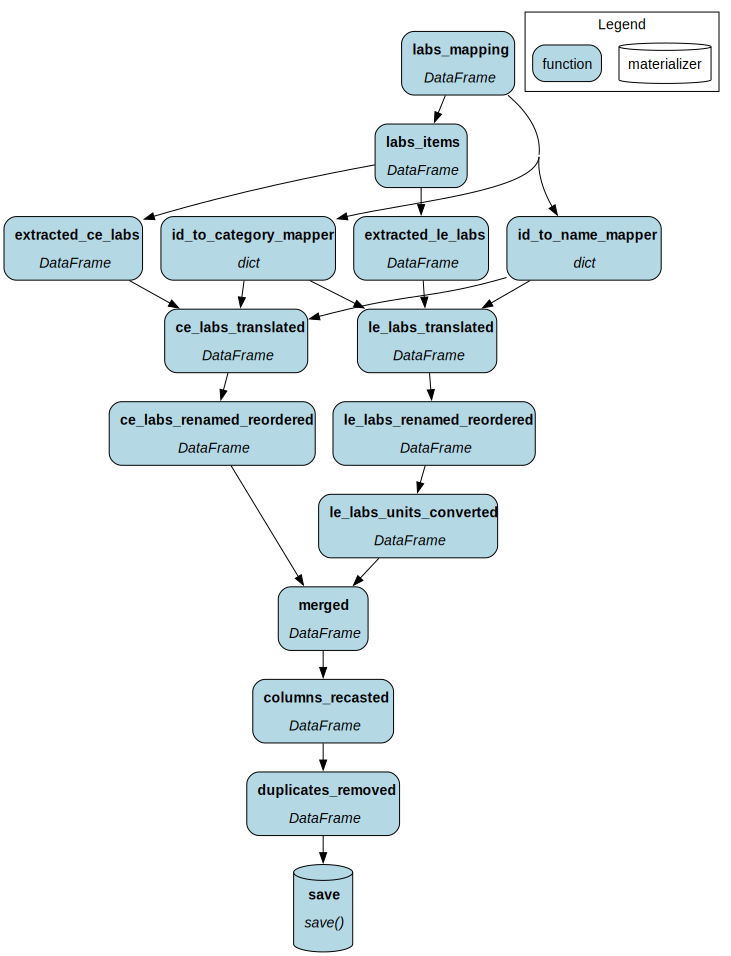

In [9]:
from hamilton import driver

dr = (
    driver.Builder()
    .with_modules(labs)
    .with_cache()
    .build()
)
dr.display_all_functions(orient = "TB")

# Dev

## dedup

In [14]:
labs_events_f = read_from_rclif("labs_intm")

In [15]:
len(labs_events_f)

46174325

In [4]:
labs_dups = find_duplicates(labs_events_f, ["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_category"]) \
    .sort_values(["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_category"])

labs_dups

,hospitalization_id,lab_order_dttm,lab_collect_dttm,lab_result_dttm,lab_order_name,lab_order_category,lab_name,lab_category,lab_value,lab_value_numeric,reference_unit,lab_specimen_name,lab_specimen_category,lab_loinc_code
9683715,20000147,NaT,2121-08-30 17:38:00,2121-08-30 17:39:00,,,pCO2,pco2_arterial,35,35.00,mm Hg,,,
44761220,20000147,NaT,2121-08-30 17:38:00,2121-08-30 17:39:00,,,Arterial CO2 Pressure,pco2_arterial,35,35.00,mmHg,,,
9683716,20000147,NaT,2121-08-30 17:38:00,2121-08-30 17:39:00,,,pH,ph_arterial,7.41,7.41,units,,,
44762337,20000147,NaT,2121-08-30 17:38:00,2121-08-30 17:39:00,,,PH (Arterial),ph_arterial,7.41,7.41,units,,,
9683717,20000147,NaT,2121-08-30 17:38:00,2121-08-30 17:39:00,,,pO2,po2_arterial,390,390.00,mm Hg,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44775215,29999625,NaT,2157-11-24 02:37:00,2157-11-24 02:40:00,,,Arterial CO2 Pressure,pco2_arterial,43,43.00,mmHg,,,
4567471,29999625,NaT,2157-11-24 02:37:00,2157-11-24 02:40:00,,,pH,ph_arterial,7.41,7.41,units,,,
44776501,29999625,NaT,2157-11-24 02:37:00,2157-11-24 02:40:00,,,PH (Arterial),ph_arterial,7.41,7.41,units,,,
4567472,29999625,NaT,2157-11-24 02:37:00,2157-11-24 02:40:00,,,pO2,po2_arterial,81,81.00,mm Hg,,,


In [5]:
# Drop trivial duplicates
labs_events_fd = labs_events_f.drop_duplicates(
        subset = ["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_category", "lab_value_numeric"],
        inplace = False)

After we drop the trivial duplicates (where the values are the same and thus simply repeated), we are left with 4015 non-trivial cases: 

In [6]:
labs_dups_d = find_duplicates(labs_events_fd, ["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_category"]) \
    .sort_values(["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_category"])

labs_dups_d

,hospitalization_id,lab_order_dttm,lab_collect_dttm,lab_result_dttm,lab_order_name,lab_order_category,lab_name,lab_category,lab_value,lab_value_numeric,reference_unit,lab_specimen_name,lab_specimen_category,lab_loinc_code
18566630,20012928,NaT,2123-03-02 04:45:00,2123-03-02 05:48:00,,,Hemoglobin,hemoglobin,7.7,7.7,g/dL,,,
18566642,20012928,NaT,2123-03-02 04:45:00,2123-03-02 05:48:00,,,Hemoglobin,hemoglobin,7.6,7.6,g/dL,,,
18566631,20012928,NaT,2123-03-02 04:45:00,2123-03-02 05:48:00,,,Platelet Count,platelet_count,148,148.0,K/uL,,,
18566643,20012928,NaT,2123-03-02 04:45:00,2123-03-02 05:48:00,,,Platelet Count,platelet_count,139,139.0,K/uL,,,
38581298,20025172,NaT,2139-12-01 08:38:00,2139-12-01 10:31:00,,,Hemoglobin,hemoglobin,7.7,7.7,g/dL,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22382782,29983564,NaT,2128-06-07 06:47:00,2128-06-07 08:42:00,,,PT,pt,12.3,12.3,sec,,,
22382766,29983564,NaT,2128-06-07 06:47:00,2128-06-07 08:42:00,,,PTT,ptt,28.4,28.4,sec,,,
22382783,29983564,NaT,2128-06-07 06:47:00,2128-06-07 08:42:00,,,PTT,ptt,28.7,28.7,sec,,,
44677336,29984509,NaT,2158-10-22 12:00:00,2158-10-22 12:04:00,,,Mixed Venous O2% Sat,so2_mixed_venous,42,42.0,%,,,


If we discard duplicates that result from many to one mapping (which we can solve by assigning duduplication rank), we are left with the case of geneinue duplicates from the same item (displayed below). Luckily, most of them seem to be close-value duplicates (which we may define as being within 10% from each other). Then the remaining are the most thorny cases: observations of the same item of the same patient at same time that differ dramatically in values. Should we drop either? both? Or are they legit duplicates from two different samples / specimens?
 

In [7]:
labs_dups_d2 = find_duplicates(labs_events_fd, ["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_name"]) \
    .sort_values(["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_category"])

In [8]:
# remove some empty columns for better display
labs_dups_d2.drop(
    columns = ["lab_order_dttm", "lab_order_name", "lab_order_category", "lab_specimen_name", "lab_specimen_category", "lab_loinc_code"],
    inplace = True
    )
labs_dups_d2

,hospitalization_id,lab_collect_dttm,lab_result_dttm,lab_name,lab_category,lab_value,lab_value_numeric,reference_unit
18566630,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Hemoglobin,hemoglobin,7.7,7.7,g/dL
18566642,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Hemoglobin,hemoglobin,7.6,7.6,g/dL
18566631,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Platelet Count,platelet_count,148,148.0,K/uL
18566643,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Platelet Count,platelet_count,139,139.0,K/uL
38581298,20025172,2139-12-01 08:38:00,2139-12-01 10:31:00,Hemoglobin,hemoglobin,7.7,7.7,g/dL
...,...,...,...,...,...,...,...,...
39224708,29977045,2134-12-23 11:35:00,2134-12-23 13:16:00,Hemoglobin,hemoglobin,6.9,6.9,g/dL
22382765,29983564,2128-06-07 06:47:00,2128-06-07 08:42:00,PT,pt,12.4,12.4,sec
22382782,29983564,2128-06-07 06:47:00,2128-06-07 08:42:00,PT,pt,12.3,12.3,sec
22382766,29983564,2128-06-07 06:47:00,2128-06-07 08:42:00,PTT,ptt,28.4,28.4,sec


In [9]:
labs_dups_d2

,hospitalization_id,lab_collect_dttm,lab_result_dttm,lab_name,lab_category,lab_value,lab_value_numeric,reference_unit
18566630,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Hemoglobin,hemoglobin,7.7,7.7,g/dL
18566642,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Hemoglobin,hemoglobin,7.6,7.6,g/dL
18566631,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Platelet Count,platelet_count,148,148.0,K/uL
18566643,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Platelet Count,platelet_count,139,139.0,K/uL
38581298,20025172,2139-12-01 08:38:00,2139-12-01 10:31:00,Hemoglobin,hemoglobin,7.7,7.7,g/dL
...,...,...,...,...,...,...,...,...
39224708,29977045,2134-12-23 11:35:00,2134-12-23 13:16:00,Hemoglobin,hemoglobin,6.9,6.9,g/dL
22382765,29983564,2128-06-07 06:47:00,2128-06-07 08:42:00,PT,pt,12.4,12.4,sec
22382782,29983564,2128-06-07 06:47:00,2128-06-07 08:42:00,PT,pt,12.3,12.3,sec
22382766,29983564,2128-06-07 06:47:00,2128-06-07 08:42:00,PTT,ptt,28.4,28.4,sec


In [10]:
len(labs_events_f)

46174325

In [11]:
f"{(3615 / len(labs_events_f)) * 100:.2f}%"

7.829026195835023e-05

## handle NA lab values (`valuenum`)
sometimes the `value` or `valuenum` are NA, or in a weird blank form "__". need to check if they are always accompanied by otherwise useful comments 

In [37]:
df_le.head()

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,lab_name,lab_category
0,248852,10014610,22077651,58477112,50983,None,2171-10-02 06:10:00,2171-10-02 07:40:00,134,134.0,mEq/L,133.0,145.0,None,ROUTINE,None,Sodium,sodium
1,248853,10014610,22077651,58477112,51006,None,2171-10-02 06:10:00,2171-10-02 07:40:00,20,20.0,mg/dL,6.0,20.0,None,ROUTINE,None,Urea Nitrogen,bun
2,248876,10014610,22077651,5414949,51146,None,2171-10-02 16:00:00,2171-10-02 16:19:00,0.1,0.1,%,0.0,2.0,None,STAT,None,Basophils,basophils_percent
3,248877,10014610,22077651,5414949,51200,None,2171-10-02 16:00:00,2171-10-02 16:19:00,0.1,0.1,%,0.0,4.0,None,STAT,None,Eosinophils,eosinophils_percent
4,248879,10014610,22077651,5414949,51222,None,2171-10-02 16:00:00,2171-10-02 16:19:00,12.1,12.1,g/dL,14.0,18.0,abnormal,STAT,None,Hemoglobin,hemoglobin


In [ ]:
mask = df_le['valuenum'].isna()
print(f"{mask.sum()} ({mask.mean()*100:.1f}%) rows have NaN for `valuenum`")
na_valuenum: pd.DataFrame = df_le[mask]
na_valuenum.head()

223966 (0.5%) rows have NaN for `valuenum`


,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,lab_name,lab_category
154,729,10000084,23052089,45668018,51003,None,2160-11-20 22:30:00,2160-11-21 00:09:00,None,NaN,ng/mL,0.0,0.01,None,STAT,<0.01. cTropnT > 0.10 ng/mL suggests Acute MI.,Troponin T,troponin_t
761,4312,10000826,20032235,19147705,50924,None,2146-12-06 04:24:00,2146-12-06 13:17:00,None,NaN,ng/mL,13.0,150.00,None,ROUTINE,GREATER THAN 2000.,Ferritin,ferritin
1298,6677,10000935,25849114,27669265,51003,None,2187-10-11 06:25:00,2187-10-11 08:27:00,None,NaN,ng/mL,0.0,0.01,None,ROUTINE,<0.01. CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.,Troponin T,troponin_t
1982,9280,10000980,25911675,12085599,51003,None,2191-05-22 16:50:00,2191-05-23 04:12:00,None,NaN,ng/mL,0.0,0.01,None,STAT,<0.01. CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.,Troponin T,troponin_t
2024,9601,10000980,29659838,9079188,51003,None,2191-07-16 19:38:00,2191-07-16 23:21:00,None,NaN,ng/mL,0.0,0.01,None,STAT,<0.01. CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.,Troponin T,troponin_t


In [22]:
na_valuenum.value_counts('lab_name')

lab_name
Troponin T                         107398
Bilirubin, Total                    14913
PTT                                 13217
Platelet Count                      10364
INR(PT)                             10103
PT                                   9873
Alanine Aminotransferase (ALT)       9445
Hemoglobin                           5463
Basophils                            4286
Neutrophils                          4286
Eosinophils                          4283
Monocytes                            4279
Lymphocytes                          4279
Absolute Basophil Count              4002
Bilirubin, Direct                    3417
C-Reactive Protein                   2843
Urea Nitrogen                        1809
Potassium                            1428
Creatinine                           1217
Glucose                               765
pCO2                                  635
Bicarbonate                           617
Asparate Aminotransferase (AST)       568
Ferritin                 

In [27]:
dist = na_valuenum.value_counts(['lab_name', 'comments'])
dist

lab_name                        comments                                       
Troponin T                      <0.01.  CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.    66054
                                <0.01.  cTropnT > 0.10 ng/mL suggests Acute MI.    40239
Bilirubin, Total                <0.2.                                              14789
Alanine Aminotransferase (ALT)  <5.                                                 8817
PTT                             UNABLE TO REPORT.                                   6814
Name: count, dtype: int64

In [28]:
# count prevalence of these cases within each lab_name
df_le.groupby('lab_name').apply(lambda x: x[x['valuenum'].isna()].shape[0] / x.shape[0])

/var/folders/yc/t9yjml6j0jn7hyvbns2vqc7m0000gp/T/ipykernel_19510/704152863.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_le.groupby('lab_name').apply(lambda x: x[x['valuenum'].isna()].shape[0] / x.shape[0])


lab_name
Absolute Basophil Count            0.014871
Alanine Aminotransferase (ALT)     0.011932
Albumin                            0.000284
Alkaline Phosphatase               0.000155
Asparate Aminotransferase (AST)    0.000719
Basophils                          0.009275
Bicarbonate                        0.000242
Bilirubin, Direct                  0.086086
Bilirubin, Indirect                0.000841
Bilirubin, Total                   0.019190
C-Reactive Protein                 0.046338
Calcium, Total                     0.000161
Chloride                           0.000156
Chloride, Whole Blood              0.000860
Creatinine                         0.000470
Creatinine, Whole Blood            0.005613
Eosinophils                        0.009268
Ferritin                           0.007780
Free Calcium                       0.000767
Glucose                            0.000277
Hemoglobin                         0.002131
High-Sensitivity CRP               0.047619
INR(PT)                

## add comment

Need to add comments from df_le.

In [ ]:
mask = df_le["comments"].notna()
mask.mean()

lab_name
Glucose                            2260695
Sodium                              368475
Potassium                           300817
Troponin T                          243982
PTT                                 110762
pO2                                  85057
Lactate                              80035
pH                                   65102
Platelet Count                       63774
PT                                   56043
pCO2                                 51814
Neutrophils                          41679
Bicarbonate                          39563
Free Calcium                         32834
Creatinine                           27506
Alanine Aminotransferase (ALT)       23850
Lactate Dehydrogenase (LD)           22259
C-Reactive Protein                   22075
INR(PT)                              21922
Chloride                             21413
Asparate Aminotransferase (AST)      20901
Magnesium                            17675
Bilirubin, Total                     16970
Ph

In [18]:
comments = df_le[mask]
comments.head()

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,lab_name,lab_category
13,151,10000032,22595853,86271148,50931,None,2180-05-07 05:05:00,2180-05-07 07:03:00,___,99.0,mg/dL,70.0,100.0,None,ROUTINE,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI...",Glucose,glucose_serum
32,339,10000032,22841357,88261647,50931,None,2180-06-27 05:10:00,2180-06-27 07:26:00,___,71.0,mg/dL,70.0,100.0,None,ROUTINE,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI...",Glucose,glucose_serum
42,400,10000032,29079034,55621508,50931,None,2180-07-23 21:45:00,2180-07-23 22:30:00,___,115.0,mg/dL,70.0,100.0,abnormal,STAT,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI...",Glucose,glucose_serum
57,416,10000032,29079034,20101859,50931,None,2180-07-24 06:35:00,2180-07-24 08:11:00,___,107.0,mg/dL,70.0,100.0,abnormal,STAT,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI...",Glucose,glucose_serum
65,428,10000032,29079034,72024614,51265,None,2180-07-24 06:35:00,2180-07-24 08:53:00,___,94.0,K/uL,150.0,440.0,abnormal,STAT,VERIFIED BY SMEAR.,Platelet Count,platelet_count


# Validate

### NA lab values

In [18]:
# clif_labs = read_from_rclif("labs")
clif_labs = pd.read_parquet(clif_table_pathfinder("labs"))

In [20]:
clif_labs[clif_labs["lab_value"].isna()].value_counts('lab_name')

lab_name
Troponin T                         107388
Bilirubin, Total                    14912
PTT                                 12542
Platelet Count                      10364
INR(PT)                              9799
PT                                   9602
Alanine Aminotransferase (ALT)       9444
Hemoglobin                           5463
Neutrophils                          4286
Monocytes                            4279
Lymphocytes                          4279
Basophils                            4279
Eosinophils                          4279
Absolute Basophil Count              4002
Bilirubin, Direct                    3417
C-Reactive Protein                   2843
Urea Nitrogen                        1808
Potassium                            1428
Creatinine                           1216
Glucose                               765
pCO2                                  635
Bicarbonate                           617
Asparate Aminotransferase (AST)       567
Ferritin                 

In [23]:
# compare to the new output
df_f[df_f["lab_value"].isna()].value_counts('lab_name')

lab_name
Troponin T                         107388
Bilirubin, Total                    14912
PTT                                 12542
Platelet Count                      10364
INR(PT)                              9799
PT                                   9602
Alanine Aminotransferase (ALT)       9444
Hemoglobin                           5463
Neutrophils                          4286
Monocytes                            4279
Lymphocytes                          4279
Basophils                            4279
Eosinophils                          4279
Absolute Basophil Count              4002
Bilirubin, Direct                    3417
C-Reactive Protein                   2843
Urea Nitrogen                        1808
Potassium                            1428
Creatinine                           1216
Glucose                               765
pCO2                                  635
Bicarbonate                           617
Asparate Aminotransferase (AST)       567
Ferritin                 